### AGENDA

 - Load the training dataset
 - Inspecting the train Dataset
 - Inspecting Placeholders
 - Inspecting Duplicated Values
 - Looking at Continues Fields
 - Looking at Categorical Fields
 - Correlated Features
 - Encode Categorical Features
 - Scale Continues Features
 - Inspenting Target Feature
 

## Importing some packages

In [2]:

import pandas as pd
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier 
import functions as f
import warnings
warnings.filterwarnings('ignore')


## Load the Train Preprocess Dataset

In [1]:
df_train = pd.read_csv('census_income_learn_preprocess.csv')

<IPython.core.display.Javascript object>

In [2]:
df_train.head()

,age,class_of_worker,detailed_industry_code,detailed_occupation_code,education,wage_per_hour,enrolled_in_edu_last_week,marital_status,major_industry_code,major_occupation_code,...,cob_mother,cob_self,citizenship,own_business_or_self_employed,fill_in_questionnaire_for_veterans_admin,veterans_benefits,weeks_worked_in_year,year,target,binary_target
0,0.811111,0.000,0.000000,0.000000,0.0000,0.0,0.0,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,no savings
1,0.644444,0.125,0.019608,0.021739,0.0625,0.0,0.0,0.166667,0.043478,0.071429,...,0.00000,0.00000,0.00,0.0,0.0,0.0,0.019231,1.0,0.0,no savings
2,0.200000,0.000,0.000000,0.000000,0.1250,0.0,0.5,0.333333,0.000000,0.000000,...,0.02381,0.02381,0.25,0.0,0.0,0.0,0.000000,0.0,0.0,no savings
3,0.100000,0.000,0.000000,0.000000,0.1875,0.0,0.0,0.333333,0.000000,0.000000,...,0.00000,0.00000,0.00,0.0,0.0,0.5,0.000000,1.0,0.0,no savings
4,0.111111,0.000,0.000000,0.000000,0.1875,0.0,0.0,0.333333,0.000000,0.000000,...,0.00000,0.00000,0.00,0.0,0.0,0.5,0.000000,1.0,0.0,no savings


## Train Classifieres on the Train Set

In [15]:
x = df_train.loc[:,df_train.columns != 'target'].drop('binary_target',axis = 1)# drop target and binary_target
y = df_train.loc[:,'target'] # drop all features less the targert

In [17]:
# split the train dataset into training and validation sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(f'The training x set contains {x_train.shape[0]} rows and {x_train.shape[1]} columns')
print(f'The training y set contains {y_train.shape[0]} rows and 1 column')
print(f'The test x set contains {x_test.shape[0]} rows and {x_test.shape[1]} columns')
print(f'The test y set contains {y_test.shape[0]} rows and 1 column')

The training x set contains 122316 rows and 40 columns
The training y set contains 122316 rows and 1 column
The test x set contains 30580 rows and 40 columns
The test y set contains 30580 rows and 1 column


## Decision Tree Classifier

Accuracy: 90.83 %
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95     28144
         1.0       0.43      0.48      0.46      2436

    accuracy                           0.91     30580
   macro avg       0.69      0.71      0.70     30580
weighted avg       0.91      0.91      0.91     30580



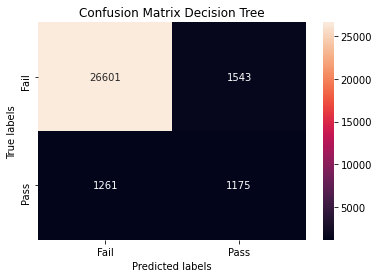

In [18]:
f.classifier(DecisionTreeClassifier,x_train, y_train, x_test,y_test, 'Decision Tree')

## Ramdom Forest Emsamble Model

Accuracy: 94.19 %
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97     28144
         1.0       0.73      0.43      0.54      2436

    accuracy                           0.94     30580
   macro avg       0.84      0.71      0.75     30580
weighted avg       0.93      0.94      0.93     30580



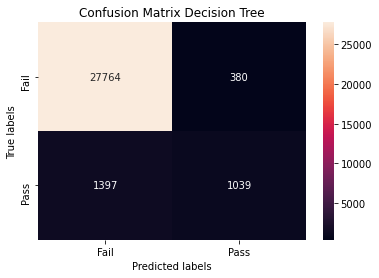

In [20]:
f.classifier(RandomForestClassifier,x_train, y_train, x_test,y_test, 'Decision Tree')

## Balance Tager Feature With SMOTE

In [21]:
X_resampled, y_resampled = SMOTE().fit_sample(x, y)
# split the train dataset into training and validation sets
x_train_smote, x_test_smote, y_train_smote, y_test_smote = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
print(f'The training x set contains {x_train_smote.shape[0]} rows and {x_train_smote.shape[1]} columns')
print(f'The training y set contains {y_train_smote.shape[0]} rows and 1 column')
print(f'The test x set contains {x_test_smote.shape[0]} rows and {x_test_smote.shape[1]} columns')
print(f'The test y set contains {y_test_smote.shape[0]} rows and 1 column')



The training x set contains 224846 rows and 40 columns
The training y set contains 224846 rows and 1 column
The test x set contains 56212 rows and 40 columns
The test y set contains 56212 rows and 1 column


In [ ]:
# print(f"Before OverSampling, counts of label '1': {sum(y_train == 1)}")
# print(f"Before OverSampling, counts of label '0': {sum(y_train == 0)}")
 
# X_resampled, y_resampled = SMOTE().fit_sample(x, y) 
# print(f'After OverSampling, the shape of train_X: {X_train_resampled.shape}')
# print(f'After OverSampling, the shape of train_y: {y_train_resampled.shape}')
  
# print(f"After OverSampling, counts of label '1': {sum(y_train_resampled == 1)}")
# print(f"After OverSampling, counts of label '0': {sum(y_train_resampled == 0)}")

In [ ]:
# print(f"Before OverSampling, counts of label '1': {sum(y_train == 1)}")
# print(f"Before OverSampling, counts of label '0': {sum(y_train == 0)}")
 
# X_resampled, y_resampled = SMOTE().fit_sample(x_train, y_train) 
# print(f'After OverSampling, the shape of train_X: {X_train_resampled.shape}')
# print(f'After OverSampling, the shape of train_y: {y_train_resampled.shape}')
  
# print(f"After OverSampling, counts of label '1': {sum(y_train_resampled == 1)}")
# print(f"After OverSampling, counts of label '0': {sum(y_train_resampled == 0)}")

Accuracy: 93.18 %
              precision    recall  f1-score   support

         0.0       0.94      0.93      0.93     28045
         1.0       0.93      0.94      0.93     28167

    accuracy                           0.93     56212
   macro avg       0.93      0.93      0.93     56212
weighted avg       0.93      0.93      0.93     56212



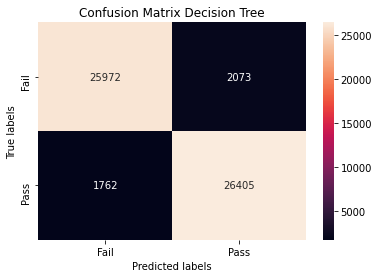

In [22]:
f.classifier(DecisionTreeClassifier,x_train_smote, y_train_smote, x_test_smote, y_test_smote, 'Decision Tree')

Accuracy: 96.26 %
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.96     28045
         1.0       0.96      0.97      0.96     28167

    accuracy                           0.96     56212
   macro avg       0.96      0.96      0.96     56212
weighted avg       0.96      0.96      0.96     56212



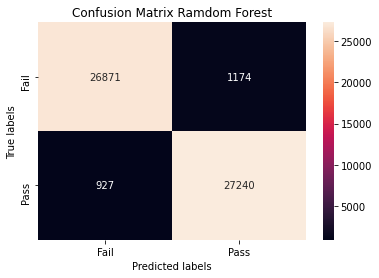

In [23]:
f.classifier(RandomForestClassifier,x_train_smote, y_train_smote, x_test_smote, y_test_smote, 'Ramdom Forest')